In [0]:
# comment all the codes in spacy
import urllib
import urllib.request
import urllib.parse
import re
import requests
import collections
def build_google_drive_url(doc_id):

  DRIVE1  = "https://docs.google.com/uc" 
  DRIVE2  = "https://drive.google.com/uc"  

  baseurl = DRIVE1 # DRIVE2 works as well 
  params = {"export" : "download",
            "id"     : doc_id}
 
  url = baseurl + "?" + urllib.parse.urlencode(params) 
  return url

def read_remote(url):
  # assumes the url is already encoded (see urllib.parse.urlencode)
  response = requests.get(url)
  if response.status_code == requests.codes.ok: # that is 200
    return response.text
  return None


In [0]:
def get_id():
  return '1jOCDUhsMY3uAoLqV3NoZogyrr-FVqEoo'

In [0]:
def get_harry_potter():
  h=read_remote(build_google_drive_url(get_id()))
  return h
hp = get_harry_potter()

In [0]:
def normalize(tokens):
  l=[]
  for t in tokens:
    if t[0]=="'":
      t = t.replace("'",'')
    if(t[-1]=="'"):
      t =t.replace("'",'')
    if (t[-2:]=="'s"):
      t=t.replace("'s",'')
    l.append(t)
  return l
  

In [0]:
import re
def clean_hp(text):
  regex =text.find('Harry',text.find('Drive'))
  text=text[regex:].strip()
  return text
#print(clean_hp(get_harry_potter()))
print(len(clean_hp(get_harry_potter())))

437835


In [0]:

# from nltk.corpus import stopwords
# def load_stop_words(add_pronouns):
#   # spacy to load stop words 
#   s1 = list(nlp.Defaults.stop_words)
#   pronouns = ['they', 'your', "who", "she'd", "he'd", 'madam', 'he', "she", 'i', 'it', "i'm", "i've", "oh", "you", "mr", "mrs", "i'll", "i'd"]
#   s2=list(pronouns)
#   t=s1
#   if (add_pronouns==True):
#     t=s1+s2
#   return t

# print(len(load_stop_words(True)))
# print(len(load_stop_words(False)))



344
326


In [0]:
def split_text_into_tokens(text):
  a = re.findall(r"['A-Za-z0-9]+-?['A-Za-z0-9]+",text)
  return normalize(a)
print(split_text_into_tokens("Harry's becomes Harry 'going to come' "))

['Harry', 'becomes', 'Harry', 'going', 'to', 'come']


In [0]:
# import nltk
# from nltk.util import ngrams
# def bi_grams(text):
#   grams = ngrams(text, 2)
#   result=[g for g in grams]
#   return result


In [0]:
def remove_stop_words(tokens, stoplist):
  k=[]
  for j in tokens:
    l=j.lower()
    if (l in stoplist):
      k=k 
    else:
      k.append(j)
  return k

In [0]:
import collections
def top_n(tokens, n):
  counter = collections.Counter()
  for w in tokens:
    counter[w] += 1
  return counter.most_common(n)

In [0]:
def find_characters_v1(text, stoplist=[],top=15):
  tokens = split_text_into_tokens(text)
  cleaned = remove_stop_words(tokens, stoplist)
  upperletter="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  h=[]
  for j in cleaned:
    if j[0] in upperletter:
      h.append(j)
  result=top_n(h,top)
  return result
# change the parameter stopwords to have a default value of an empty list
# change the parameter top to have a default value of 15


In [0]:
def find_characters_v2(text, stoplist=[],top=15):
  words=bi_grams(text)
  u=[]
  for i in words:
    j , k = i
    if ((j[0].isupper()) and (k[0].isupper()) and (j.lower() not in stoplist) and (k.lower() not in stoplist)):
      u.append(i)
  v2=top_n(u,top)
  g=[]
  for i in range(len(v2)):
    p=v2[i][0]
    t=(p[0]+' '+p[1]+','+str(v2[i][1]))
    t=tuple(t.split(','))
    g.append(t)
  return g


In [0]:
def split_into_chapters(text):
  # this is not the way you should solve this
  m2 = re.finditer(r"^CHAPTER\s{1}[A-Z]+$", text, re.M)
  pseudo_titles = [t.span() for t in m2]
  result=[]
  for i in range(len(pseudo_titles)):
    if(i<(len(pseudo_titles)-1)):
      l=text[pseudo_titles[i][0]:pseudo_titles[i+1][0]]
    else:
      l=text[pseudo_titles[i][0]:]
    result.append(l)
  return result
print(split_into_chapters(clean_hp(get_harry_potter())))

['CHAPTER ONE\nTHE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you\'d expect to be involved in anything strange or mysterious, because they just didn\'t hold with such nonsense.\nMr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.\nThe Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn\'t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley\'s sis

In [0]:
import numpy as np
def get_character_counts_v1(chapter):
  harry =np.char.count(chapter, "Harry")
  ron =np.char.count(chapter, "Ron")
  hagrid =np.char.count(chapter, "Hagrid")
  hermione =np.char.count(chapter, "Hermione")
  return np.array([harry, ron, hagrid, hermione])

chapter_total=split_into_chapters(clean_hp(get_harry_potter()))
print(get_character_counts_v1(chapter_total))
print(len(clean_hp(get_harry_potter())))


[[ 20  79  68  48 147 117  63  49  70  82  68  99  62  45  93 116  99]
 [  0   0   0   0   0  73  14  22  37  45  22  51  40  31  32  65  22]
 [ 14   0   0  40 102  13   4  27   5   0  19  20   1  50  46  17  12]
 [  0   0   0   0   0   8   5  10  19  27  21  10  30  32  28  65  15]]
437835


In [0]:
def simple_graph_v1(plots):

  fig = plt.figure()
  subplot = fig.add_subplot(1,1,1)
  subplot.plot(plots[0])
  subplot.plot(plots[1])
  subplot.plot(plots[2])
  subplot.plot(plots[3]) 

  # this is important for testing
  return fig  

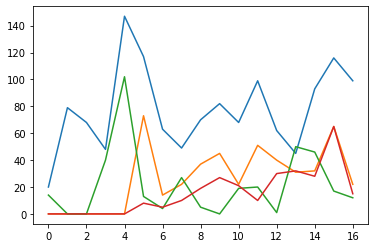

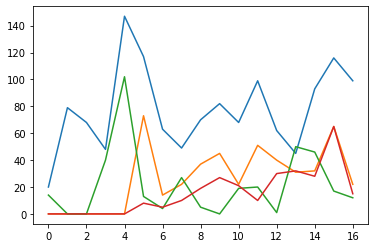

In [0]:
import matplotlib
import matplotlib.pyplot as plt
def pipeline_v1():
  hp = clean_hp(get_harry_potter())
  chapters = split_into_chapters(hp)
  plots = get_character_counts_v1(chapters)
  fig = simple_graph_v1(plots)
  return fig
pipeline_v1()

In [62]:
def get_character_counts_v2(chapters, names):

  # use the same function as v1
  # use a comprehension to easily get things done:
  py_data = [np.char.count(chapters, n) for n in names ]
  counts = np.array([np.cumsum(c) for c in py_data])
  counts = counts.transpose()
  return counts
# test it
who = ["Ron", "Hagrid"]
chapters=split_into_chapters(clean_hp(get_harry_potter()))
print(get_character_counts_v2(chapters, who))

[[  0  14]
 [  0  14]
 [  0  14]
 [  0  54]
 [  0 156]
 [ 73 169]
 [ 87 173]
 [109 200]
 [146 205]
 [191 205]
 [213 224]
 [264 244]
 [304 245]
 [335 295]
 [367 341]
 [432 358]
 [454 370]]


In [63]:
def pipeline_v2(names):

  hp = clean_hp(get_harry_potter())
  chapters = split_into_chapters(hp)
  np_hp_data = get_character_counts_v2(chapters, names)
  print(np_hp_data.shape)
  return np_hp_data

who = ["Harry", "Ron", "Hagrid", "Hermione"]
print(pipeline_v2(who))

(17, 4)
[[  20    0   14    0]
 [  99    0   14    0]
 [ 167    0   14    0]
 [ 215    0   54    0]
 [ 362    0  156    0]
 [ 479   73  169    8]
 [ 542   87  173   13]
 [ 591  109  200   23]
 [ 661  146  205   42]
 [ 743  191  205   69]
 [ 811  213  224   90]
 [ 910  264  244  100]
 [ 972  304  245  130]
 [1017  335  295  162]
 [1110  367  341  190]
 [1226  432  358  255]
 [1325  454  370  270]]


(17, 4)


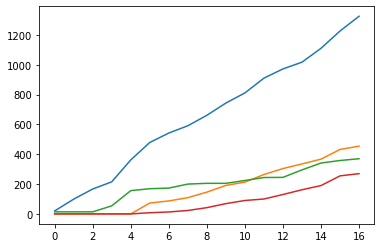

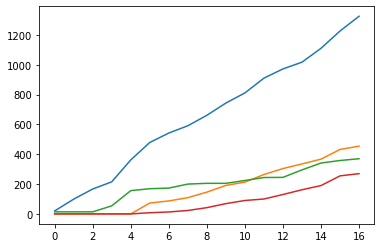

In [64]:
def simple_graph_v2(counts):
  fig = plt.figure()
  subplot = fig.add_subplot(1,1,1)
  subplot.plot(counts)
  return fig  # return the figure
# test it
who = ["Harry", "Ron", "Hagrid", "Hermione"]
data = pipeline_v2(who)
simple_graph_v2(data)

In [65]:
values = [1, 0, 2, 0, 3]
print(np.cumsum(values))

[1 1 3 3 6]


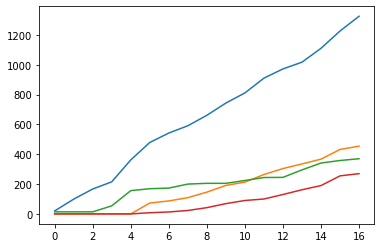

In [66]:
def pipeline_v2(names):
  hp = clean_hp(get_harry_potter())
  chapters = split_into_chapters(hp) 
  np_hp = get_character_counts_v2(chapters, names)
  fig = simple_graph_v2(np_hp)
  return fig
who = ["Harry", "Ron", "Hagrid", "Hermione"]
fig = pipeline_v2(who)

In [0]:
def simple_graph_hp(counts, names):
    plt.style.use('fivethirtyeight')
    chapters = np.linspace(1,len(counts),len(counts))
    fig = plt.figure()
    subplot = fig.add_subplot(1,1,1)
    plots=subplot.plot(chapters,counts)
    fig.suptitle('HP Characters XYS')
    subplot.set_xlabel('chapter')
    subplot.set_ylabel('mentions')
    subplot.set_xticks(chapters)
    subplot.grid(True)
    subplot.legend(handles=plots,loc='upper left',labels=names)
    return fig

In [0]:
def simple_graph_v2(counts):
  fig = plt.figure()
  subplot = fig.add_subplot(1,1,1)
  subplot.plot(counts)
  return fig

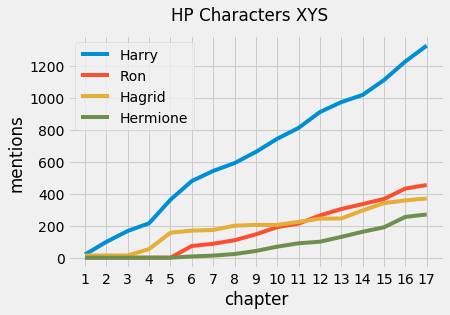

In [86]:
def pipeline_v2(names):
  hp = clean_hp(get_harry_potter())
  chapters = split_into_chapters(hp) 
  np_hp = get_character_counts_v2(chapters, names)
  fig = simple_graph_hp(np_hp,names)
  return fig
who = ["Harry", "Ron", "Hagrid", "Hermione"]
fig = pipeline_v2(who)